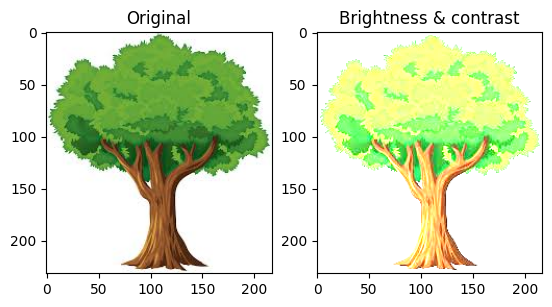

In [3]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

image = cv2.imread('tree.jpeg') 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image_rgb) 


brightness = 10
contrast = 2.3
image2 = cv2.addWeighted(image_rgb, contrast, np.zeros(image_rgb.shape, image_rgb.dtype), 0, brightness) 

plt.subplot(1, 2, 2) 
plt.title("Brightness & contrast") 
plt.imshow(image2) 
plt.show()


Sharpening images

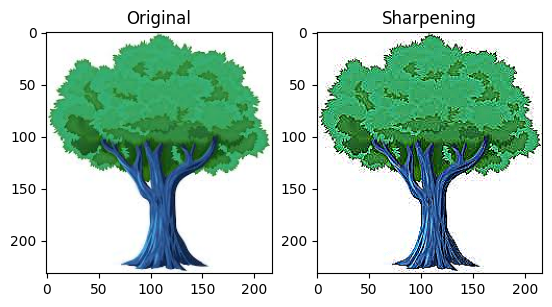

In [4]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

image = cv2.imread('tree.jpeg') 

plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image) 

kernel = np.array([[-1, -1, -1], 
                   [-1, 10, -1], 
                   [-1, -1, -1]]) 

sharpened_image = cv2.filter2D(image, -1, kernel) 

plt.subplot(1, 2, 2) 
plt.title("Sharpening") 
plt.imshow(sharpened_image) 
plt.show()


Image dtype: uint8, shape: (232, 217), min: 0, max: 255


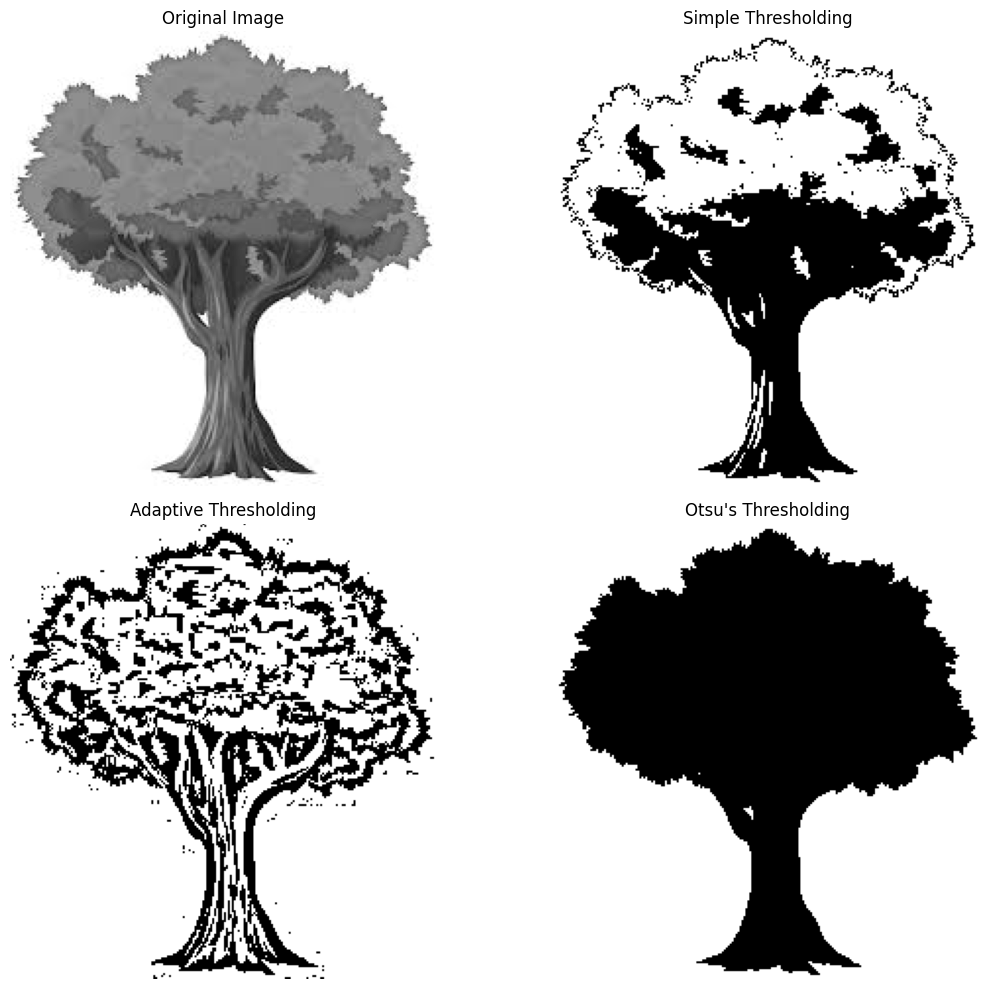

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_thresholding(image):
    _, simple_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                            cv2.THRESH_BINARY, 11, 2)

    _, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return simple_thresh, adaptive_thresh, otsu_thresh

image_path = 'tree.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

print(f"Image dtype: {image.dtype}, shape: {image.shape}, min: {image.min()}, max: {image.max()}")

simple_thresh, adaptive_thresh, otsu_thresh = apply_thresholding(image)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(simple_thresh, cmap='gray')
axs[1].set_title('Simple Thresholding')
axs[1].axis('off')

axs[2].imshow(adaptive_thresh, cmap='gray')
axs[2].set_title('Adaptive Thresholding')
axs[2].axis('off')

axs[3].imshow(otsu_thresh, cmap='gray')
axs[3].set_title('Otsu\'s Thresholding')
axs[3].axis('off')

plt.tight_layout()
plt.show()
